In [1]:
import os
import matplotlib.pyplot as plt
import IPython.display as display
import pickle

# Base path where your images are stored
image_base_path = '../Figures/halo_check_images'

# Assuming all your images are in a single folder and follow the 'simr431h1.png' naming convention
image_files = [f for f in os.listdir(image_base_path) if f.endswith('.png')]

# Prepare an empty dictionary for classifications
halo_types_dict = {}

def classify_halo(image_path):
    """
    Displays the image for classification.
    This function should be adapted based on your interactive environment.
    """
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # For a script, this would be manual classification,
    # but in an interactive environment like Jupyter Notebook,
    # you could use input() to classify each image.
    classification = input("Enter classification (Central, Backsplash, Satellite): ")
    return classification

# Iterate through each image file
for image_file in image_files:
    # Extract simulation and halo ID from the filename
    parts = image_file.split('h')
    simulation_id = parts[0]  # e.g., 'simr431'
    halo_id = parts[1].split('.')[0]  # e.g., '1'

    image_path = os.path.join(image_base_path, image_file)

    # Call the function to display the image and classify
    classification = classify_halo(image_path)

    # Store the classification in the dictionary
    if simulation_id not in halo_types_dict:
        halo_types_dict[simulation_id] = {}
    halo_types_dict[simulation_id][halo_id] = classification

    # Clear the output to prepare for the next image
    display.clear_output(wait=True)

# Once classification is done, convert the dictionary to the format expected by 'HaloTypes.txt'
with open('HaloTypes.txt', 'w') as file:
    file.write("SimulationID\tHaloID\tType\n")  # Writing header
    for sim, halos in halo_types_dict.items():
        for hid, type in halos.items():
            file.write(f"{sim}\t{hid}\t{type}\n")

print("Classification completed and saved to HaloTypes.txt.")


FileNotFoundError: [Errno 2] No such file or directory: '../Figures/halo_check_images'

In [7]:
#import BWMDC sims from ../PickleFiles/SimulationInfo.pickle
import pickle
import pynbody
with open('../PickleFiles/SimulationInfo.MerianCDM.pickle', 'rb') as f:
    sims = pickle.load(f)
#open sim 'cptmarvel' and load halo catalog
sim = sims['r431']

s = pynbody.load(sim['path'])
s.physical_units()

pynbody.snapshot.tipsy : Loading /data/REPOSITORY/romulus_zooms/r431.romulus25.3072g1HsbBH/r431.romulus25.3072g1HsbBH.004096/r431.romulus25.3072g1HsbBH.004096
pynbody.snapshot : Loading using backend <class 'pynbody.snapshot.tipsy.TipsySnap'>
pynbody.snapshot.tipsy : Loading /data/REPOSITORY/romulus_zooms/r431.romulus25.3072g1HsbBH/r431.romulus25.3072g1HsbBH.004096/r431.romulus25.3072g1HsbBH.004096


In [8]:

h = s.halos()



pynbody.snapshot.tipsy : Attempting to load auxiliary array /data/REPOSITORY/romulus_zooms/r431.romulus25.3072g1HsbBH/r431.romulus25.3072g1HsbBH.004096/r431.romulus25.3072g1HsbBH.004096.amiga.grp


In [9]:
halo = h[1]

In [36]:
pynbody.analysis.halo.center(halo, mode='hyb')
rvir = pynbody.analysis.halo.virial_radius(halo,overden=178)
print(rvir)

pynbody.analysis._com : Initial rough COM=[-0.00604414  0.01859719 -0.03371759]
pynbody.analysis.halo : Final SSC=[ 2.07147071e-13 -5.16958438e-15 -1.20242358e-14]
pynbody.analysis.halo : Finding halo velocity center...
pynbody.analysis.halo : vcen=[ 1.61617195e-12 -1.21437145e-13 -8.83307160e-13]
pynbody.analysis.halo : target_rho=7001.256566624509
pynbody.snapshot.tipsy : Attempting to load auxiliary array /data/REPOSITORY/romulus_zooms/r431.romulus25.3072g1HsbBH/r431.romulus25.3072g1HsbBH.004096/r431.romulus25.3072g1HsbBH.004096.r
pynbody.snapshot.tipsy : Attempting to load auxiliary array /data/REPOSITORY/romulus_zooms/r431.romulus25.3072g1HsbBH/r431.romulus25.3072g1HsbBH.004096/r431.romulus25.3072g1HsbBH.004096.r
pynbody.snapshot.simsnap : Deriving array r
pynbody.util : Entering bisection search algorithm
pynbody.util : 0.000000 121.789612 243.579224 -5946.303188
pynbody.util : 121.789612 182.684418 243.579224 3161.080617
pynbody.util : 121.789612 152.237015 182.684418 365.432525

149.50150598483938


In [28]:
rvir2 = halo.all_keys()

In [43]:
rvir2 = h[1].properties.keys()

print(rvir2)

dict_keys(['omegaM0', 'omegaL0', 'h', 'boxsize', 'a', 'time', 'halo_id'])


SyntaxError: expected 'except' or 'finally' block (498971299.py, line 3)

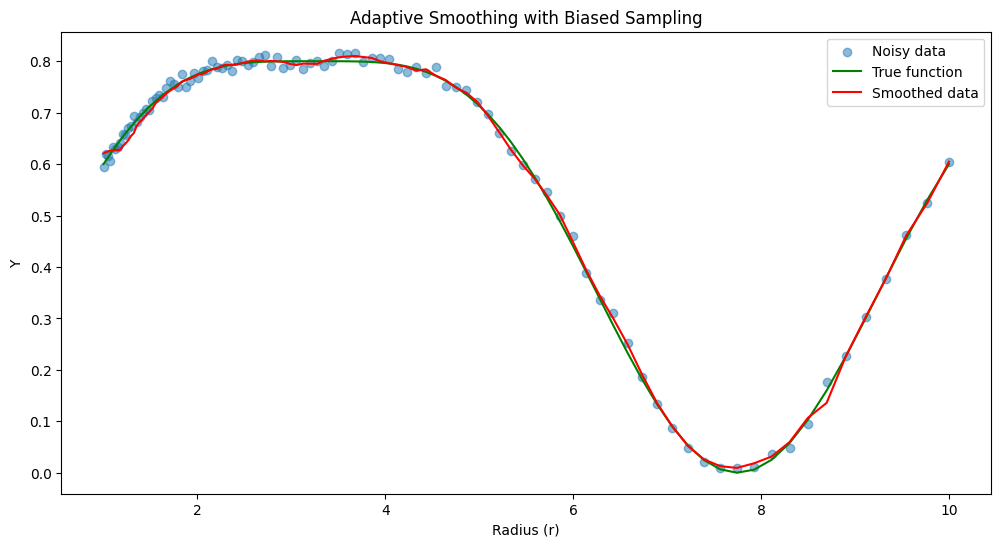

Number of samples: 100
R range: 1.00 to 10.00
Percentage of samples below r=5: 70.0%


In [24]:
import numpy as np
import matplotlib.pyplot as plt

def count_points_within_distance(r, point, d):
    return np.sum((r >= point - d) & (r <= point + d))

import numpy as np
from scipy.ndimage import gaussian_filter1d
from scipy.interpolate import interp1d

def adaptive_smooth(x, y, distance=0.2, sigma=6):
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]
    
    # Create a new array for smoothed y values
    y_smooth = np.zeros_like(y_sorted)
    
    for i, xi in enumerate(x_sorted):
        # Find indices of points within the specified distance
        mask = np.abs(x_sorted - xi) <= distance
        x_window = x_sorted[mask]
        y_window = y_sorted[mask]
        
        # Apply Gaussian smoothing to the window
        if len(y_window) > 1:
            y_smooth[i] = gaussian_filter1d(y_window, sigma)[0]
        else:
            y_smooth[i] = y_window[0]
    
    # Clip values between 0 and 1
    y_smooth = np.clip(y_smooth, 0, 1)
    
    # Create an interpolation function
    f = interp1d(x_sorted, y_smooth, kind='cubic', fill_value='extrapolate')
    
    # Display a warning if y values are not between 0 and 1
    if np.any(y_smooth < 0) or np.any(y_smooth > 1):
        print('Warning: Some smoothed values are not in the physical range [0, 1]')
    
    # Return a callable function that clips the output between 0 and 1
    return lambda x_new: np.clip(f(x_new), 0, 1)

def test_function(r):
    # Polynomial function that stays between 0 and 1 for r in [1, 10]
    normalized_r = (r - 1) / 9  # Map [1, 10] to [0, 1]
    y = 0.5 + 0.4 * np.sin(2 * np.pi * normalized_r) + 0.1 * np.cos(4 * np.pi * normalized_r)
    return y

def generate_biased_samples(n_samples, r_min=1, r_max=10, bias=2):
    # Generate samples with bias towards lower r values
    u = np.random.uniform(0, 1, n_samples)
    r = r_min + (r_max - r_min) * (u ** bias)
    return np.sort(r)

# Generate test data
n_samples = 100
r = np.logspace(0, 1, n_samples)
#add some noise to r based on the size of r
#r = r + np.random.normal(0,0.001*r)
#resort r
r = np.sort(r)
y_true = test_function(r)

# Add some noise to the data
noise_level = 0.01
y_noisy = y_true + noise_level * np.random.randn(n_samples)

# Apply smoothing
d = .2  # Distance parameter for point density calculation
smoothed_y = adaptive_smooth(r, y_noisy, d)

# Plotting
plt.figure(figsize=(12, 6))
plt.scatter(r, y_noisy, alpha=0.5, label='Noisy data')
plt.plot(r, y_true, 'g-', label='True function')
plt.plot(r, smoothed_y(r), 'r-', label='Smoothed data')
plt.xlabel('Radius (r)')
plt.ylabel('Y')
plt.legend()
plt.title('Adaptive Smoothing with Biased Sampling')
plt.show()

# Print some statistics
print(f"Number of samples: {n_samples}")
print(f"R range: {r.min():.2f} to {r.max():.2f}")
print(f"Percentage of samples below r=5: {100 * np.mean(r < 5):.1f}%")

In [21]:
print(r[10:20])

[1.26229512 1.29382527 1.3232602  1.351585   1.38552564 1.41613261
 1.44824478 1.48464461 1.51882748 1.55368081]
